# Payment Fraudulent Trasection Detection using Machine Learning.

In [1]:
# Importing Libraries and Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the datasets 
data = pd.read_csv('Money Laundering.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# The dataset have these columns – 
# Feature	Description
# -------------------------------------------------
# 1. step	tells about the unit of time
# 2. type	type of transaction done
# 3. amount	the total amount of transaction
# 4. nameOrg	account that starts the transaction 
# 5. oldbalanceOrg	Balance of the account of sender before transaction
# 6. newbalanceOrg	Balance of the account of sender after transaction
# 7. nameDest	account that receives the transaction
# 8. oldbalanceDest	Balance of the account of receiver before transaction
# 9. newbalanceDest	Balance of the account of receiver after transaction
# 10. isFraud	The value to be predicted i.e. 0 or 1
# 11. isFlaggedFraud	Transection amount more than 200000 is FlaggedFraud ie 1 else 0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Checking for any missing value:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Checking for any dublicate value
data.duplicated().sum()

0

In [7]:
# Descriptive Stats:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# Data types
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


In [9]:
# Segregating dtypes from data
object_list = data.dtypes[data.dtypes == 'object'].index.tolist()
integer_list = data.dtypes[data.dtypes == 'int64'].index.tolist()
float_list = data.dtypes[data.dtypes == 'float64'].index.tolist()

print("Categorical_Variable:   ", object_list)
print("Integer_Variable    :   ", integer_list)
print("Float_Variable      :   ", float_list)

Categorical_Variable:    ['type', 'nameOrig', 'nameDest']
Integer_Variable    :    ['step', 'isFraud', 'isFlaggedFraud']
Float_Variable      :    ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


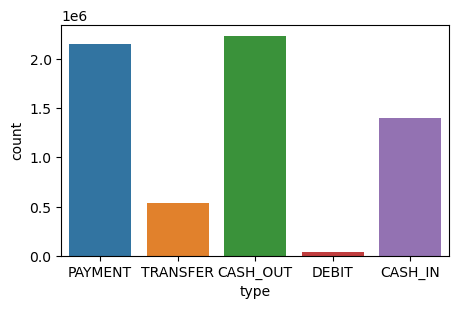

'Insight-1: PAYMENT & CASH_OUT have maximum transections in dataset.'

In [10]:
# Let’s see the count plot of the Payment type column using Seaborn library.
plt.figure(figsize=(5,3))
sns.countplot(x='type', data=data)
plt.show()
"""Insight-1: PAYMENT & CASH_OUT have maximum transections in dataset."""

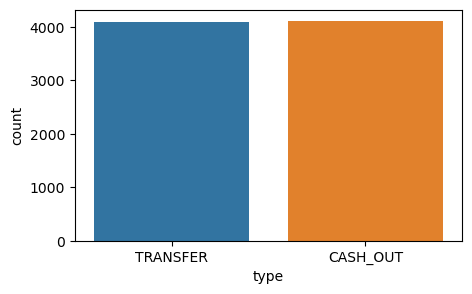

' Insight-2: All fraudulant transection are occured in payment type TRANSFER & CASH_OUT.'

In [11]:
# Analysing the Froud Transection 
df1 = data[data['isFraud']==1]     # Creating dataframe with all fraudulent transection. 

plt.figure(figsize=(5,3))
sns.countplot(x='type', data=df1)
plt.show()

""" Insight-2: All fraudulant transection are occured in payment type TRANSFER & CASH_OUT."""

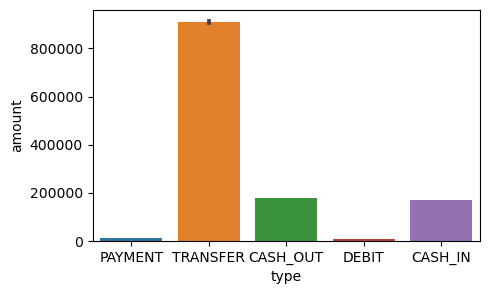

'TRANSFER has maximum amount of transection record in overall dataset.'

In [12]:
# Analysing the amount on the basis of transection type on overall data. 
plt.figure(figsize=(5,3))
sns.barplot(x='type', y='amount', data=data)
plt.show()

"""TRANSFER has maximum amount of transection record in overall dataset."""

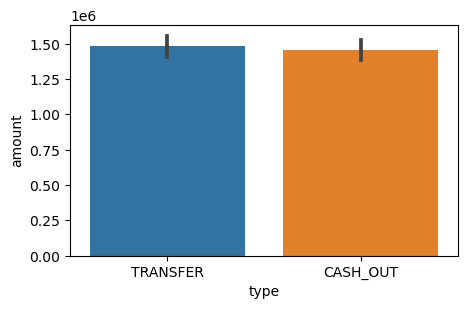

'TRANSFER & CASH_OUT have maximum amount transection record in fraudulant transection'

In [13]:
# Analysing the amount on the basis of transection type on fraudulant transection.
plt.figure(figsize=(5,3))
sns.barplot(x='type', y='amount', data=df1)
plt.show()
"""TRANSFER & CASH_OUT have maximum amount transection record in fraudulant transection"""

## Visualising the data. 

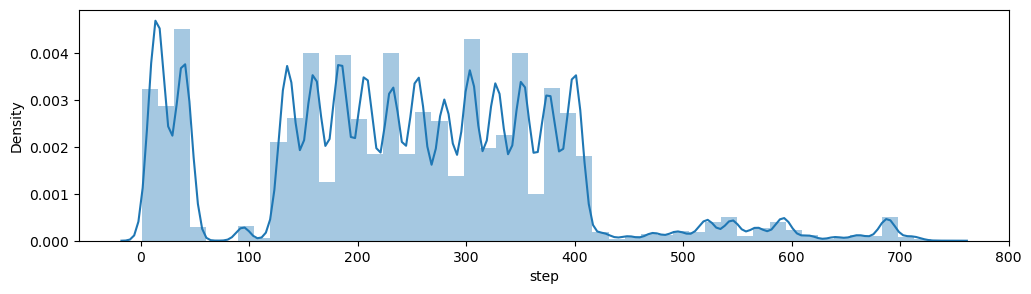

In [14]:
# Now let’s see the distribution of the step column using distplot.
plt.figure(figsize=(12, 3))
sns.distplot(data['step'], bins=50)
plt.show()

In [15]:
print(float_list, end='')

['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

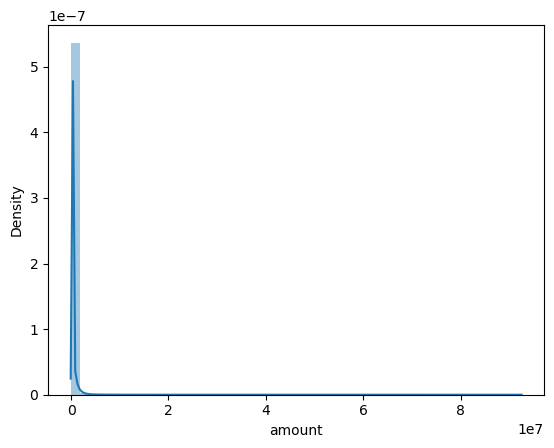

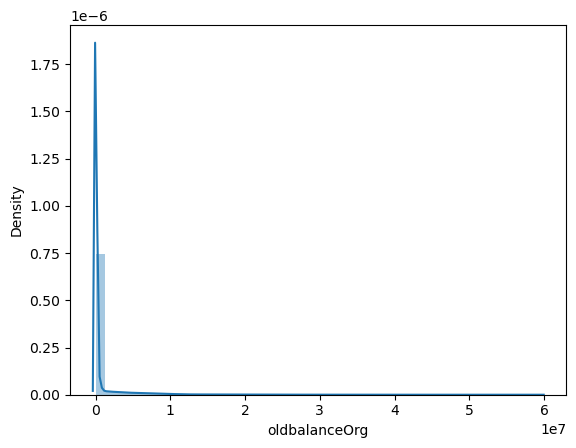

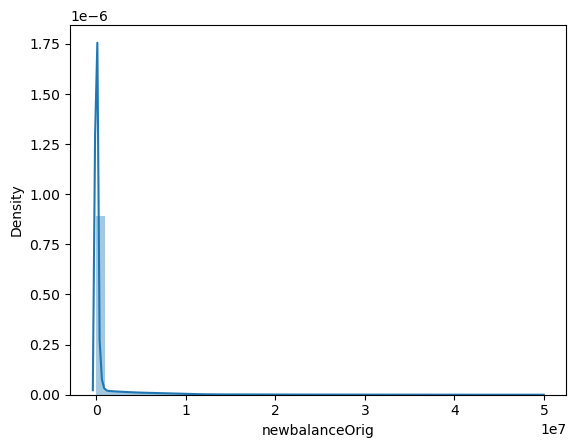

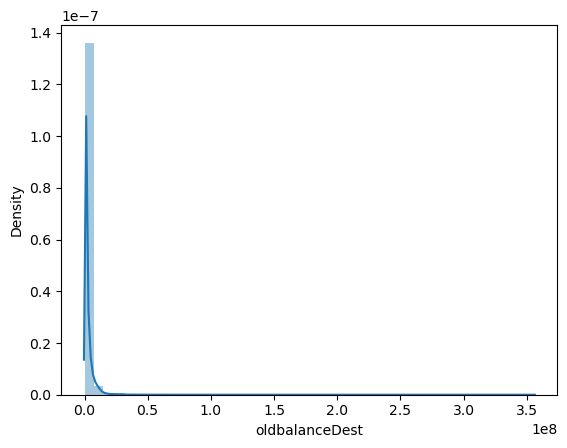

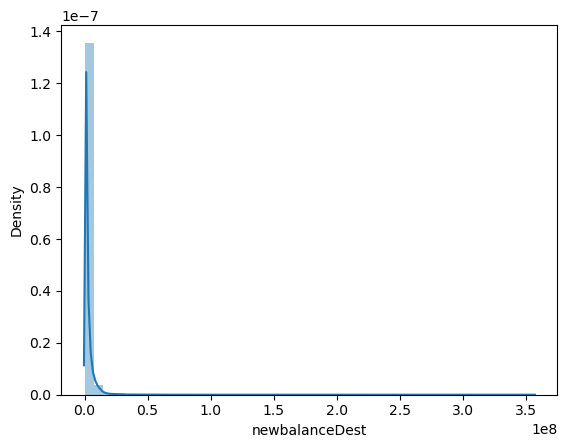

In [16]:
# Finding the distribution of data based on distplot.

def distplot(col):
    sns.distplot(data[col], bins=50)
    plt.show()
    
for i in float_list:
    distplot(i)

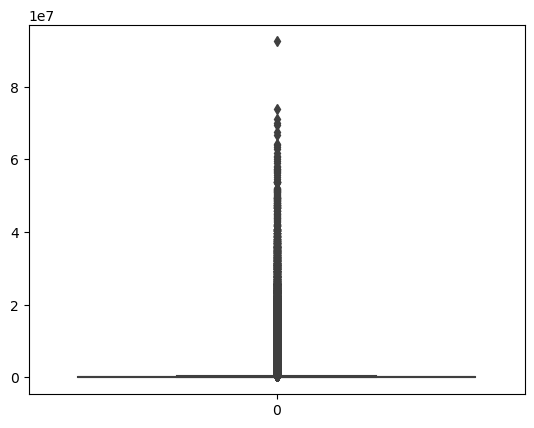

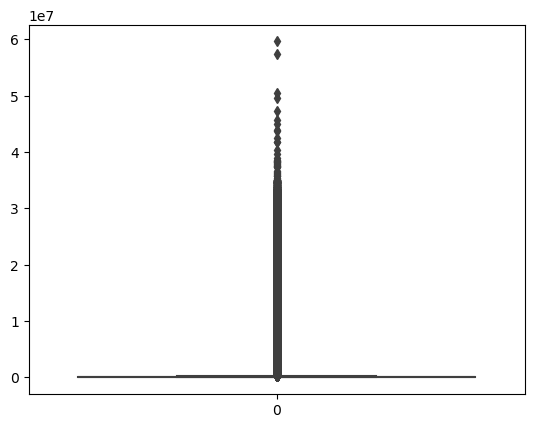

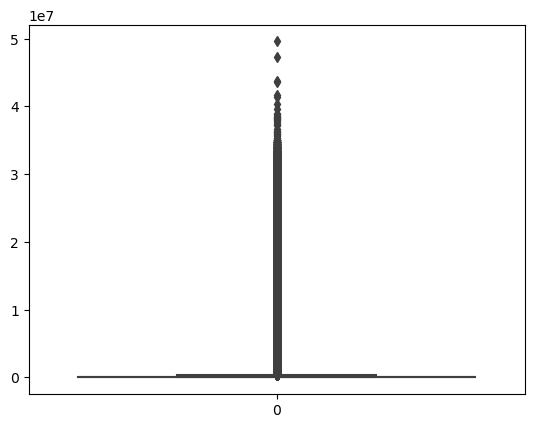

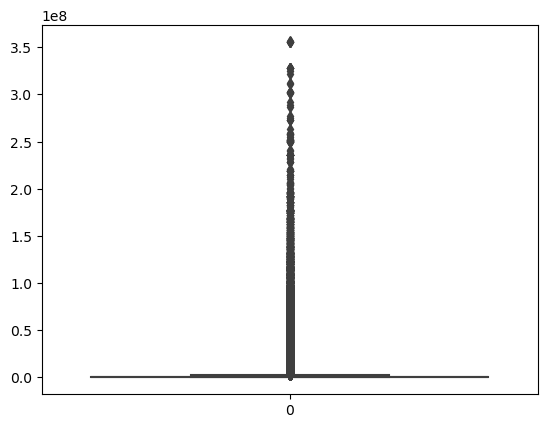

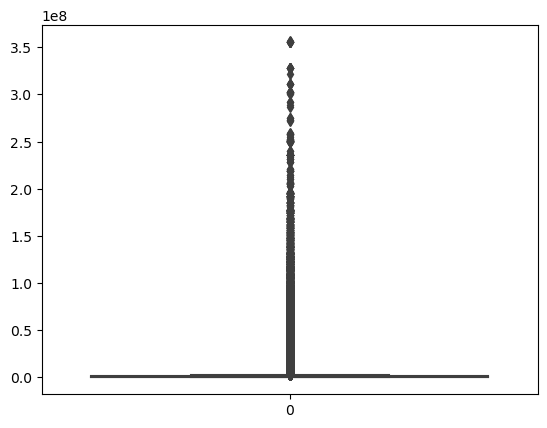

In [17]:
# Finding the distribution of data based on boxplots.

def boxplot(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in float_list:
    boxplot(i)

In [18]:
# Drawing pairwise plot to check any relation between two variables.

sns.set_style('whitegrid')
sns.pairplot(data=data, diag_kind='kde', hue='isFraud')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002A718F4EFC0> (for post_execute):


KeyboardInterrupt: 

<Axes: >

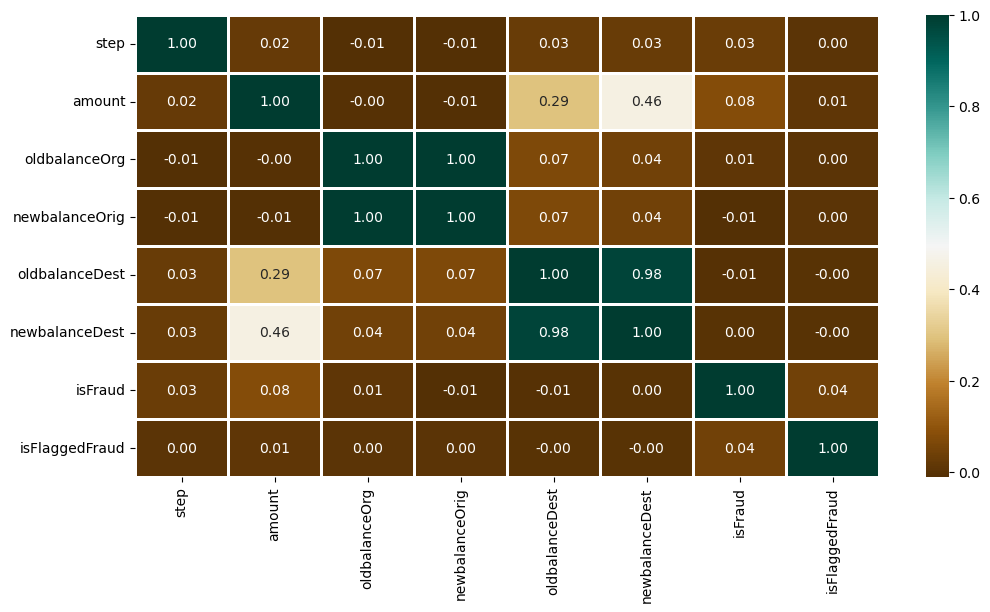

In [13]:
# Now, Let’s find the correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

# Data Preprocessing:

### Taking sample of 100000 data for ease.

In [14]:
data_samp = data.sample(n=100000, random_state=40,ignore_index=True)
data_samp.shape

(100000, 11)

In [15]:
data_samp['isFraud'].value_counts()

isFraud
0    99848
1      152
Name: count, dtype: int64

In [16]:
# Now dropping the irrelevant columns.
X = data_samp.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = data_samp['isFraud']

In [17]:
# Let’s check the shape of extracted data.
X.shape, y.shape

((100000, 8), (100000,))

In [18]:
# Checking for balance or imbalance datasets.
y.value_counts()

isFraud
0    99848
1      152
Name: count, dtype: int64

<Axes: >

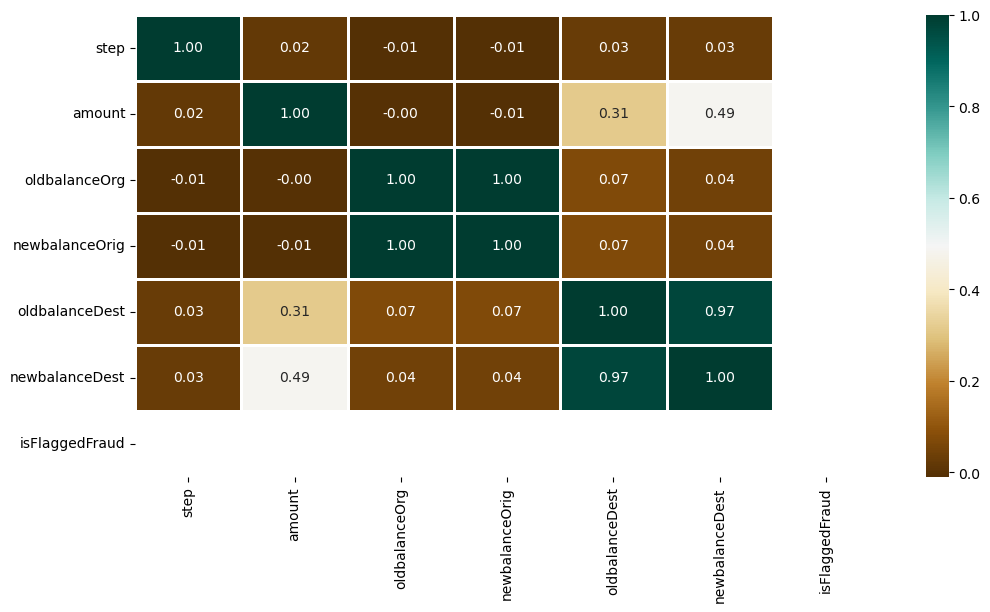

In [19]:
# Now, Let’s find the correlation among different features using Heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(numeric_only=True),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

In [20]:
# Dropping the columns which has high correlation such as oldbalanceOrg and oldbalanceDest.
X.drop(columns=['oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)

In [21]:
X.shape

(100000, 6)

In [22]:
X.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud
0,347,PAYMENT,14491.89,0.00,0.00,0
1,255,PAYMENT,19879.48,49599.52,0.00,0
2,13,CASH_IN,132780.97,3497758.36,3638562.49,0
3,188,CASH_OUT,160818.25,0.00,853617.01,0
4,234,CASH_OUT,106847.08,0.00,106847.08,0


In [23]:
type_new = pd.get_dummies(X['type'], drop_first=True, dtype=int)
X_new = pd.concat([X, type_new], axis=1)
X_new.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,347,PAYMENT,14491.89,0.00,0.00,0,0,0,1,0
1,255,PAYMENT,19879.48,49599.52,0.00,0,0,0,1,0
2,13,CASH_IN,132780.97,3497758.36,3638562.49,0,0,0,0,0
3,188,CASH_OUT,160818.25,0.00,853617.01,0,1,0,0,0
4,234,CASH_OUT,106847.08,0.00,106847.08,0,1,0,0,0


In [24]:
X_new.drop(columns='type', axis=1, inplace=True)

In [25]:
X_new.head()

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,347,14491.89,0.00,0.00,0,0,0,1,0
1,255,19879.48,49599.52,0.00,0,0,0,1,0
2,13,132780.97,3497758.36,3638562.49,0,0,0,0,0
3,188,160818.25,0.00,853617.01,0,1,0,0,0
4,234,106847.08,0.00,106847.08,0,1,0,0,0


In [26]:
# Lets make the label as balanced data sets
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [27]:
print(Counter(y))

Counter({0: 99848, 1: 152})


In [28]:
# Lets balance the label
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(X_new,y)
print(Counter(y_ros))

Counter({0: 99848, 1: 99848})


In [29]:
# Scaling the X_new 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x_ros)
y = y_ros

In [30]:
X_scaled=pd.DataFrame(x,columns=X_new.columns)
X_scaled.head()

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.469471,0.000308,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.344640,0.000422,0.001364,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.016282,0.002819,0.096184,0.016963,0.0,0.0,0.0,0.0,0.0
3,0.253731,0.003414,0.000000,0.003980,0.0,1.0,0.0,0.0,0.0
4,0.316147,0.002268,0.000000,0.000498,0.0,1.0,0.0,0.0,0.0


In [31]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(X_scaled)
print(X_scaled.shape)
print(X_PCA.shape)

(199696, 9)
(199696, 4)


In [32]:
# Spliting the data into train_test_split for model building
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=100,stratify=y)

In [33]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(159756, 4) (39940, 4) (159756,) (39940,)


In [34]:
print(Y_train.value_counts())
print('------------------------------')
print(Y_test.value_counts())

isFraud
0    79878
1    79878
Name: count, dtype: int64
------------------------------
isFraud
1    19970
0    19970
Name: count, dtype: int64


In [35]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = []
models.append(('Logistic Regression', LogisticRegression(max_iter=1000)))
models.append(('Random Forest', RandomForestClassifier()))
# models.append(('Support Vector Machine', SVC()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('XGBClassifier', XGBClassifier()))

# Evaluate Each Model using Cross-Validation
results = []
names = []
scoring = 'accuracy'  

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)  # 10-fold cross-validation
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy = {cv_results.mean():.4f}, Std = {cv_results.std():.4f}')


Logistic Regression: Mean Accuracy = 0.7840, Std = 0.0035
Random Forest: Mean Accuracy = 0.9996, Std = 0.0001
K-Nearest Neighbors: Mean Accuracy = 0.9986, Std = 0.0002
Decision Tree: Mean Accuracy = 0.9994, Std = 0.0002
XGBClassifier: Mean Accuracy = 0.9966, Std = 0.0004


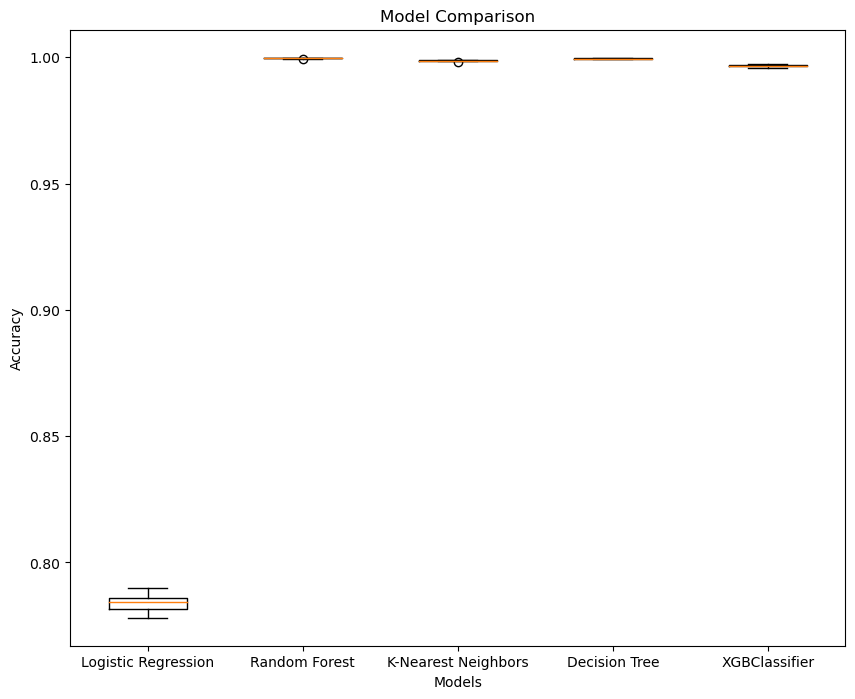

In [36]:
# Compare Models
# Plot the results
plt.figure(figsize=(10, 8))
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [37]:
# Train the XGBClassifier with Training Data and Evaluate on Test Data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Model_Accuracy_XGBClassifier:', accuracy)
print()
print('---------------------------------'*3)
print('Classification_Report')
print()
print(classification_report(Y_test, y_pred))

Model_Accuracy_XGBClassifier: 0.9972959439158738

---------------------------------------------------------------------------------------------------
Classification_Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19970
           1       0.99      1.00      1.00     19970

    accuracy                           1.00     39940
   macro avg       1.00      1.00      1.00     39940
weighted avg       1.00      1.00      1.00     39940



In [40]:
confusion_matrix(Y_test, y_pred)

array([[19862,   108],
       [    0, 19970]], dtype=int64)

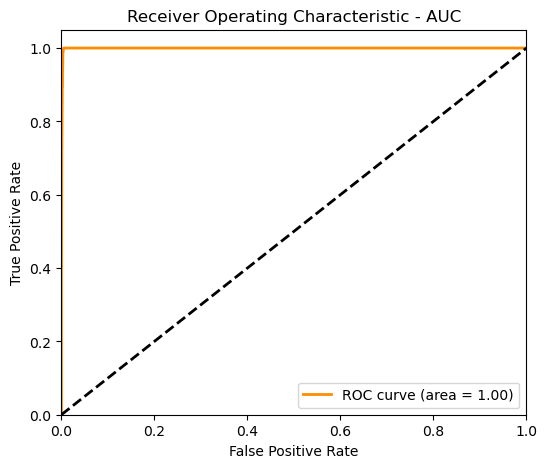

In [42]:
# Plot AUC-ROC for xgb_model:
y_score = xgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and ROC area
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AUC')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Train the RandomForestClassifier with Training Data and Evaluate on Test Data
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, Y_train)
rfc_model

RandomForestClassifier()

In [45]:
y_pred1 = rfc_model.predict(X_test)
accuracy1 = accuracy_score(Y_test, y_pred1)
print('Model_Accuracy_XGBClassifier:', accuracy1)
print()
print('---------------------------------'*3)
print('Classification_Report')
print()
print(classification_report(Y_test, y_pred1))

Model_Accuracy_XGBClassifier: 0.9997746619929895

---------------------------------------------------------------------------------------------------
Classification_Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19970
           1       1.00      1.00      1.00     19970

    accuracy                           1.00     39940
   macro avg       1.00      1.00      1.00     39940
weighted avg       1.00      1.00      1.00     39940



In [46]:
confusion_matrix(Y_test, y_pred1)

array([[19961,     9],
       [    0, 19970]], dtype=int64)

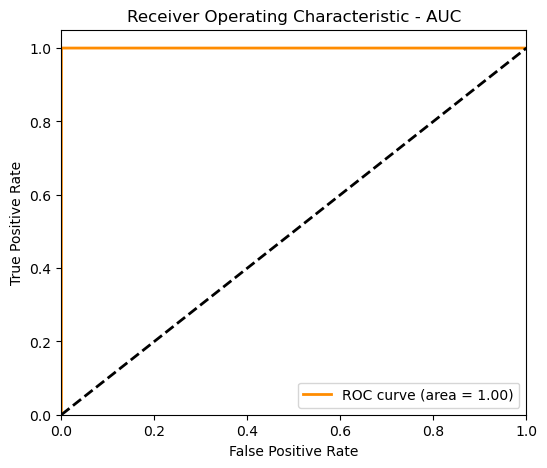

In [47]:
# Plot AUC-ROC for rfc_model:
y_score1 = rfc_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and ROC area
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_score1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AUC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# RandomForest Classifier is the best model with accuracy 100% 